In [21]:
import sys
sys.path.insert(0, '../../')
import math
import numpy as np
import matplotlib.pyplot as plt
from gasp import ssfp, responses, simulation, dataset

(256, 256, 1, 16, 3)


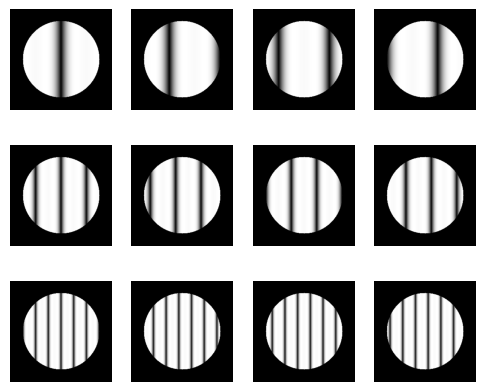

In [22]:
width = 256
height = 256
npcs = 16
TRs = [5e-3, 10e-3, 20e-3]
alpha = np.deg2rad(60)
gradient = 2 * np.pi
phantom_type = 'circle'
M = simulation.simulate_ssfp(npcs=npcs, TRs=TRs, alpha = alpha, gradient = gradient, phantom_type=phantom_type)
#simulation.view_gasp_input(M)
print(M.shape)

def plot_training_data(M, shift = 0):
    _ = np.abs(np.sqrt(np.sum(np.abs(M)**2, axis=2)))
    
    f = plt.figure(figsize=(6,5))
    ax = f.add_subplot(3,4,1)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,0+shift,0]), cmap='gray')
    ax = f.add_subplot(3,4,2)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,4+shift,0]), cmap='gray')
    ax = f.add_subplot(3,4,3)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,8+shift,0]), cmap='gray')
    ax = f.add_subplot(3,4,4)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,12+shift,0]), cmap='gray')

    ax = f.add_subplot(3,4,5)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,0+shift,1]), cmap='gray')
    ax = f.add_subplot(3,4,6)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,4+shift,1]), cmap='gray')
    ax = f.add_subplot(3,4,7)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,8+shift,1]), cmap='gray')
    ax = f.add_subplot(3,4,8)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,12+shift,1]), cmap='gray')

    ax = f.add_subplot(3,4,9)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,0+shift,2]), cmap='gray')
    ax = f.add_subplot(3,4,10)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,4+shift,2]), cmap='gray')
    ax = f.add_subplot(3,4,11)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,8+shift,2]), cmap='gray')
    ax = f.add_subplot(3,4,12)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,12+shift,2]), cmap='gray')

def plot_training_data2(M, pc, tr):
    _ = np.abs(np.sqrt(np.sum(np.abs(M)**2, axis=2)))
    print(_.shape)
    f = plt.figure(figsize=(6,5))
    ax = f.add_subplot(1,1,1)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,pc,tr]), cmap='gray')

plot_training_data(M)


(256, 256, 16, 3)


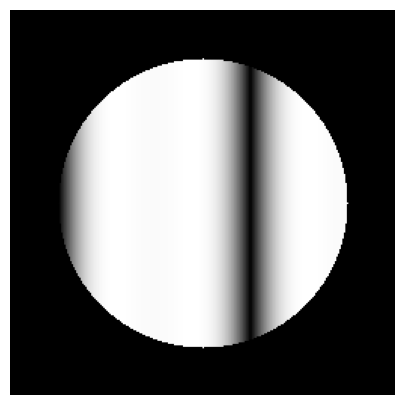

In [23]:
plot_training_data2(M,12,0)

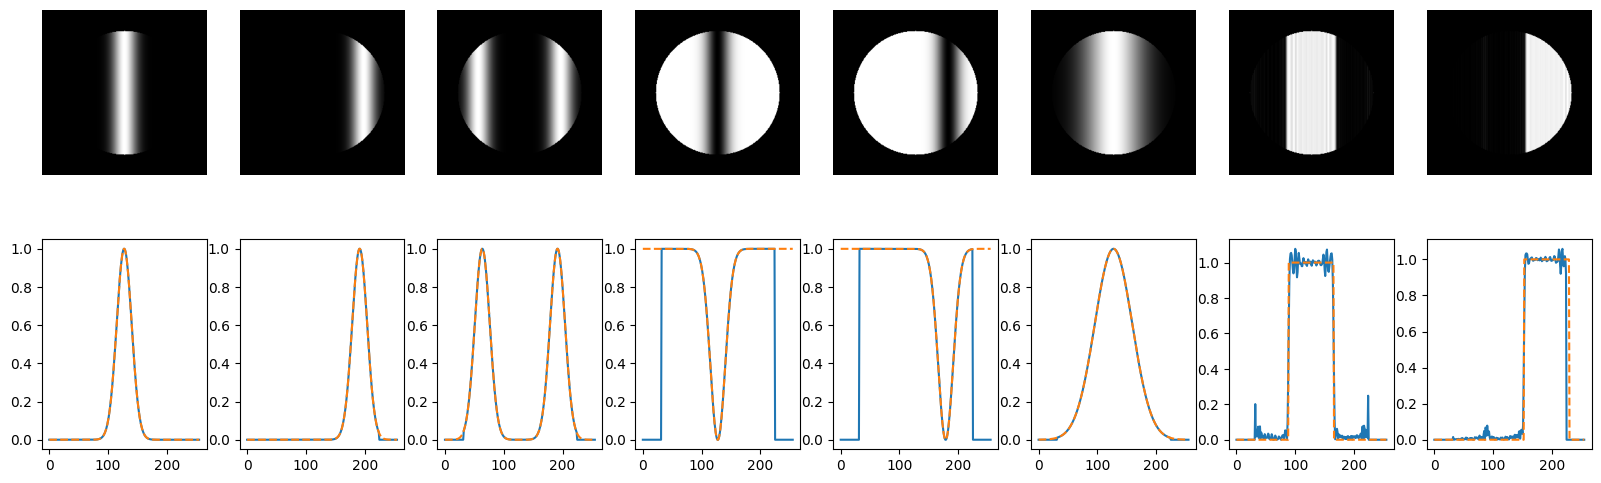

In [24]:
D = []
D.append(responses.gaussian(width, bw=0.2, shift=0))
D.append(responses.gaussian(width, bw=0.2, shift=0.25))
D.append(responses.gaussian(width, bw=0.2, shift=-0.25) + responses.gaussian(width, bw=0.2, shift=0.25))
D.append(responses.notch(width, bw=0.2, shift=0))
D.append(responses.notch(width, bw=0.2, shift=0.2))
D.append(responses.gaussian(width, bw=0.5, shift=0))
D.append(responses.square(width, bw=0.3, shift=0))
D.append(responses.square(width, bw=0.3, shift=0.25))

gradient = 2 * np.pi
method = 'lev-mar-quad'

G = []
A = []
for d in D:
    Ic, M, An = simulation.simulate_gasp(d, npcs=npcs, TRs=TRs, alpha = alpha, gradient = gradient, phantom_type=phantom_type, method=method)
    G.append(Ic)
    A.append(An)

simulation.view_gasp_comparison(G, D)

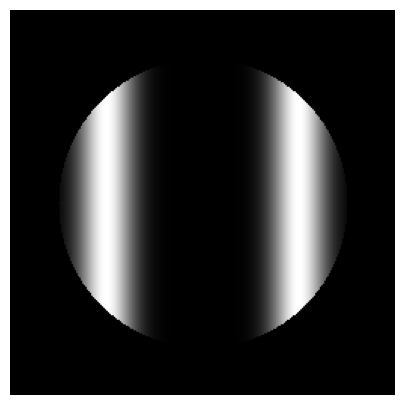

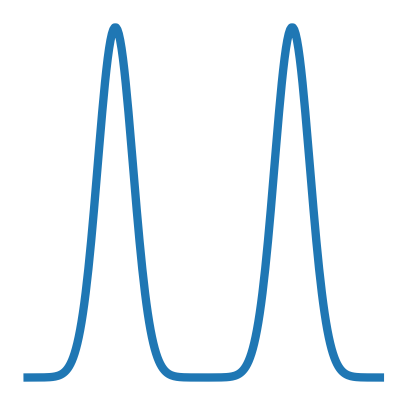

In [25]:
M = G[2]
f = plt.figure(figsize=(6,5))
ax = f.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(np.abs(np.abs(M)), cmap='gray')
plt.show()

_D = D[2]
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.axis('off')
ax.plot(np.abs(_D), linewidth=6)
plt.show()


Data: 20231106_GASP_PHANTOM data exists
pymapVBVD version 0.5.6
Software version: VB
Scan 1/1, read all mdhs:   0%|          | 0.00/265M [00:00<?, ?B/s]

pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


(128, 128, 8, 16, 3)


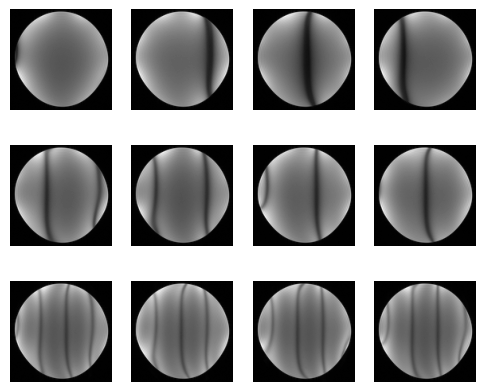

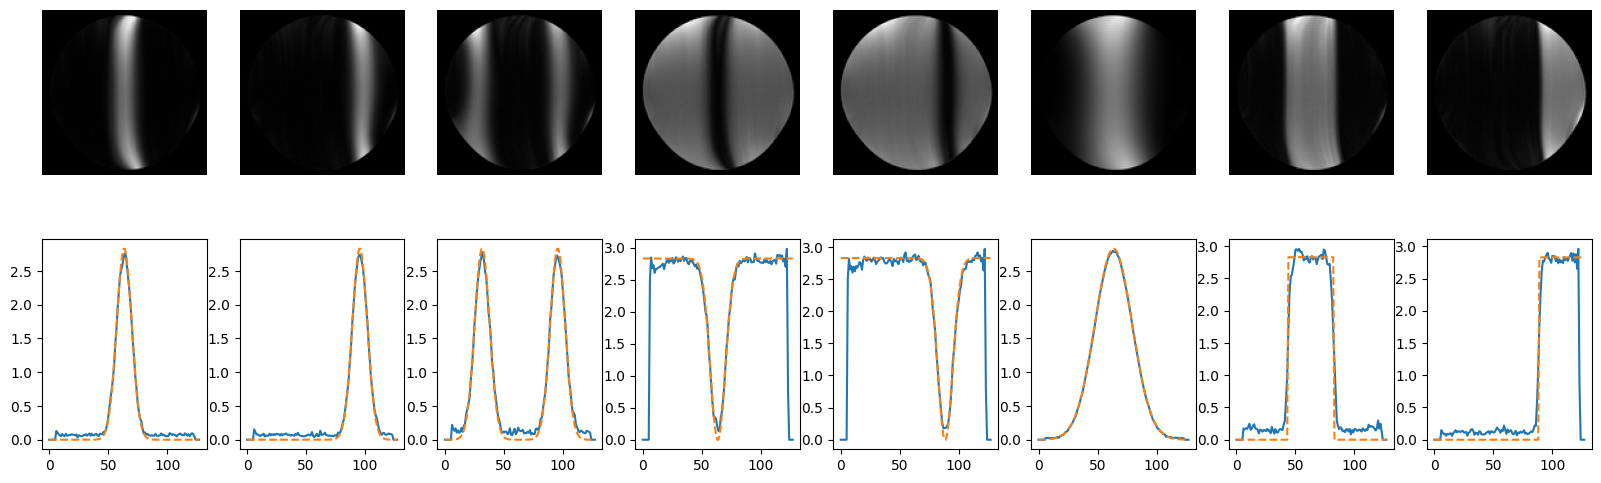

In [26]:
M = dataset.load_dataset7a()
M = M[64:192, 64:192, : ,: ,:]
print(M.shape)
width = M.shape[1]

D = []
D.append(responses.gaussian(width, bw=0.2, shift=0))
D.append(responses.gaussian(width, bw=0.2, shift=0.25))
D.append(responses.gaussian(width, bw=0.2, shift=-0.25) + responses.gaussian(width, bw=0.2, shift=0.25))
D.append(responses.notch(width, bw=0.2, shift=0))
D.append(responses.notch(width, bw=0.2, shift=0.2))
D.append(responses.gaussian(width, bw=0.5, shift=0))
D.append(responses.square(width, bw=0.3, shift=0))
D.append(responses.square(width, bw=0.3, shift=0.35))

G = []
A = []
for d in D:
    Ic, An = simulation.train_gasp(M, d, clines=16)    
    G.append(Ic)
    A.append(An)

for i in range(len(D)):
    D[i] = D[i] * math.sqrt(8)

plot_training_data(M,2)
simulation.view_gasp_comparison(G, D)

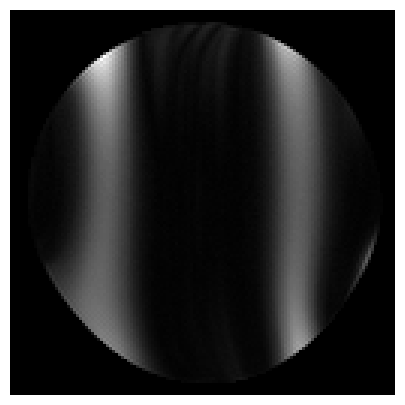

In [27]:
M = G[2]
f = plt.figure(figsize=(6,5))
ax = f.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(np.abs(np.abs(M)), cmap='gray')
plt.show()

Data: 20231106_GASP_PHANTOM data exists
pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


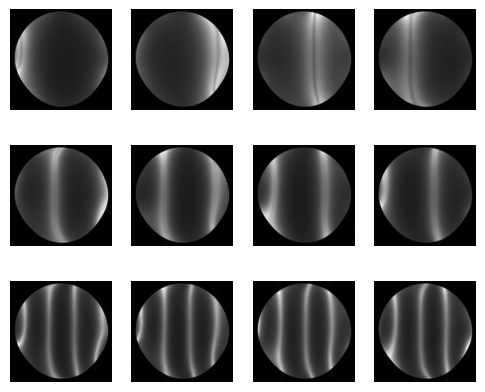

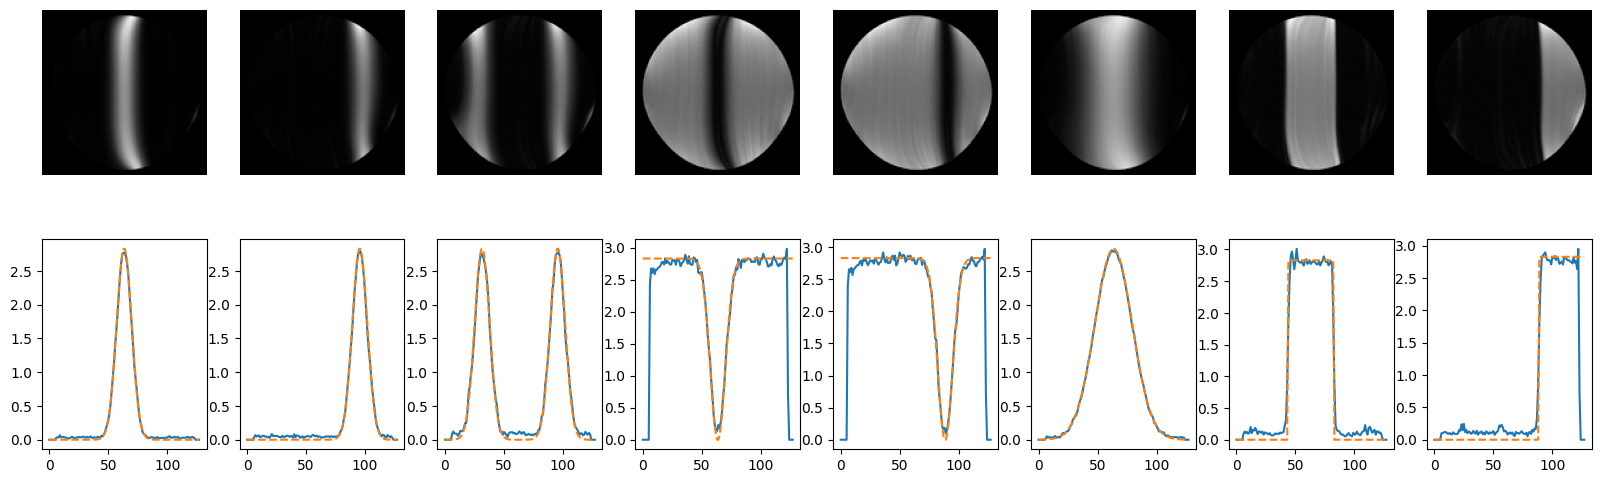

In [28]:
M = dataset.load_dataset7b()
M = M[64:192, 64:192, : ,: ,:]
width = M.shape[1]

D = []
D.append(responses.gaussian(width, bw=0.2, shift=0))
D.append(responses.gaussian(width, bw=0.2, shift=0.25))
D.append(responses.gaussian(width, bw=0.2, shift=-0.25) + responses.gaussian(width, bw=0.2, shift=0.25))
D.append(responses.notch(width, bw=0.2, shift=0))
D.append(responses.notch(width, bw=0.2, shift=0.2))
D.append(responses.gaussian(width, bw=0.5, shift=0))
D.append(responses.square(width, bw=0.3, shift=0))
D.append(responses.square(width, bw=0.3, shift=0.35))

G = []
A = []
for d in D:
    Ic, An = simulation.train_gasp(M, d, clines=16)    
    G.append(Ic)
    A.append(An)

for i in range(len(D)):
    D[i] = D[i] * math.sqrt(8)

plot_training_data(M,2)
simulation.view_gasp_comparison(G, D)

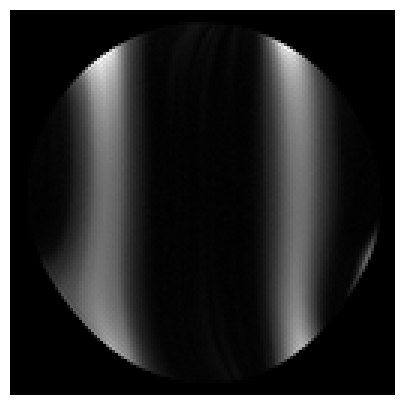

In [29]:
M = G[2]
f = plt.figure(figsize=(6,5))
ax = f.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(np.abs(np.abs(M)), cmap='gray')
plt.show()

In [30]:
def subsample_data(M):
    return M[:,:,:,::1,:]

Data: 20231106_GASP_PHANTOM data exists
pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


(128, 128, 8, 16, 3)


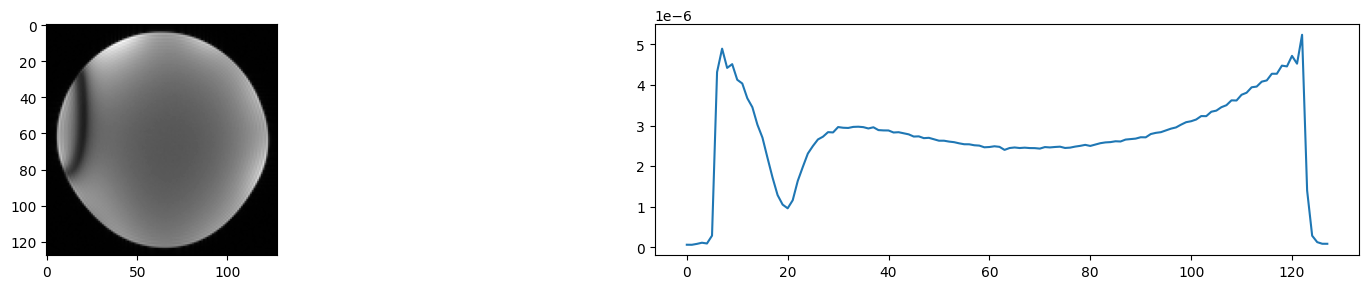

In [31]:
M90 = dataset.load_dataset7a()
M90 = M90[64:192, 64:192, : ,: ,:]
M90 = subsample_data(M90)
print(M90.shape)
simulation.view_gasp_input(M90, [0,0])

Data: 20231106_GASP_PHANTOM data exists
pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


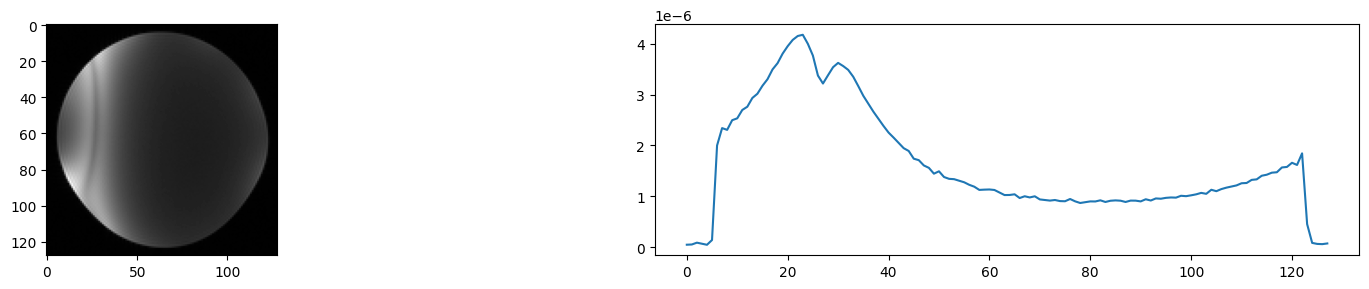

In [32]:
M20 = dataset.load_dataset7b()
M20 = M20[64:192, 64:192, : ,: ,:]
M20 = subsample_data(M20)
M20.shape 
simulation.view_gasp_input(M20, [0,0])

In [33]:
M_knee_90 = dataset.load_dataset8a()
M_knee_90 = M_knee_90[64:192, 64:192, : ,: ,:]
M_knee_90 = subsample_data(M_knee_90)
print(M_knee_90.shape)

Data: 20231106_GASP_KNEE data exists
pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


(128, 128, 8, 16, 3)


In [34]:
M_knee_20 = dataset.load_dataset8b()
M_knee_20 = M_knee_20[64:192, 64:192, : ,: ,:]
M_knee_20 = subsample_data(M_knee_20)
print(M_knee_20.shape)

Data: 20231106_GASP_KNEE data exists
pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


(128, 128, 8, 16, 3)


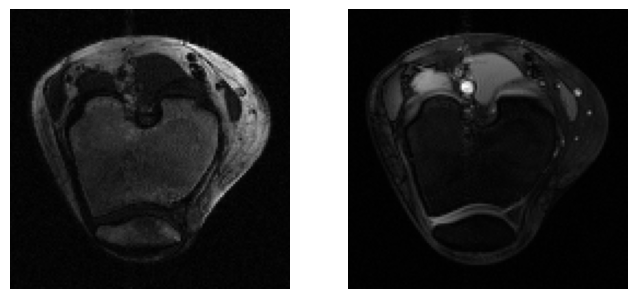

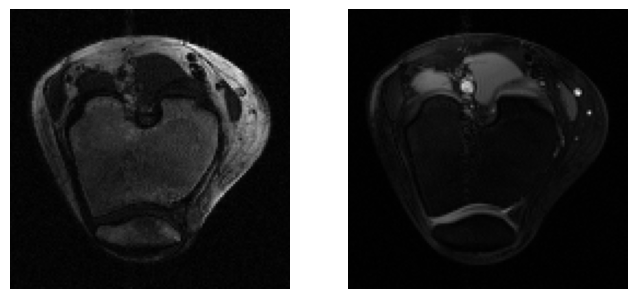

In [35]:
def waterfat_separation(D0_bw = 0.3, D0_shift = -0.3,
    M0_train = M20, M0_data = M_knee_20, D1_bw = 0.3,
    D1_shift = 0.15, M1_train = M20, M1_data = M_knee_20):
    width = 128
    D0 = responses.gaussian(width, bw=D0_bw, shift=D0_shift) 
    D1 = responses.gaussian(width, bw=D1_bw, shift=D1_shift)
    G0, A0 = simulation.train_gasp(M0_train, D0, clines=16)    
    G1, A1 = simulation.train_gasp(M1_train, D1, clines=16)    

    def evaluate_gasp(M, A):
        Ic = []
        for cc in range(M.shape[2]):
            Mc = M[:,:,cc,:,:]
            Mc = np.reshape(Mc,(Mc.shape[0], Mc.shape[0], -1))
            _I = simulation.evaluate_gasp(Mc, A[cc])
            Ic.append(_I)
        Ic = np.array(Ic)
        Ic = np.sqrt(np.sum(np.abs(Ic)**2, axis=0))
        return Ic

    results0 = evaluate_gasp(M0_data, A0)
    results1 = evaluate_gasp(M1_data, A1)

    f = plt.figure(figsize=(8,8))
    ax = f.add_subplot(2, 2, 1)
    ax2 = f.add_subplot(2, 2, 2)
    ax.imshow(results0, cmap='gray')
    ax.axis('off')
    ax2.imshow(results1, cmap='gray')
    ax2.axis('off')
    plt.show()

waterfat_separation(D0_bw = 0.3, D0_shift = -0.3, 
                    M0_train = M20, M0_data = M_knee_20,
                    D1_bw = 0.3, D1_shift = 0.15,
                    M1_train = M20, M1_data = M_knee_20)

waterfat_separation(D0_bw = 0.3, D0_shift = -0.3, 
                    M0_train = M20, M0_data = M_knee_20,
                    D1_bw = 0.3, D1_shift = 0.1,
                    M1_train = M20, M1_data = M_knee_20)

In [36]:
def view_gasp_comparison(G, D, ylim = 1):
    G = np.abs(G)
    length = len(G)

    f = plt.figure(figsize=(20,6))
    for i in range(length):
        ax = f.add_subplot(2, 8, i+1)
        ax2 = f.add_subplot(2, 8, 8 + i+1)

        g = G[i]
        d = D[i]
        ax.imshow(g, cmap='gray')
        ax.axis('off')
        ax2.plot(np.abs(g[int(g.shape[0]/2), :]), label='Simulated Profile')
        ax2.plot(d, '--', label='Desired Profile')
        ax2.set_ylim([0, ylim])
        if i != 0:
            ax2.yaxis.set_visible(False) 

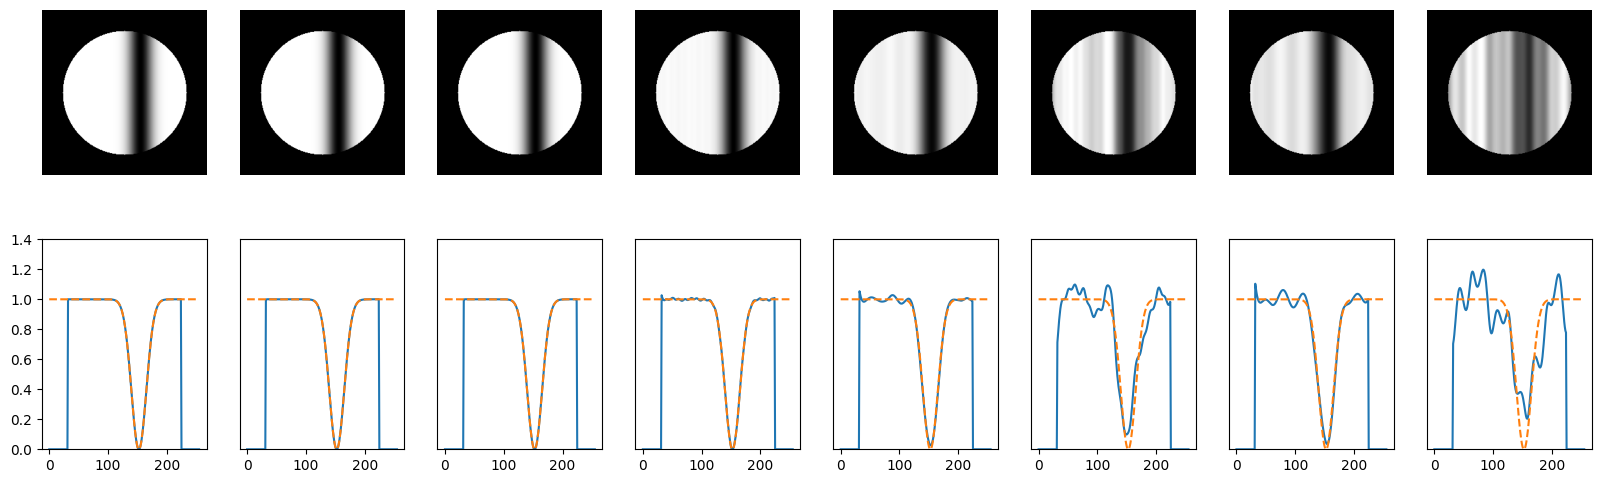

In [37]:
width = 256
height = 256
npcs = 16
alpha = np.deg2rad(60)
gradient = 2 * np.pi
phantom_type = 'circle'
#D = responses.square(width, bw=0.3, shift=0.1)
D = responses.notch(width, bw=0.2, shift=0.1)

'''
P = [{ 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':8, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':4, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':16, 'TRs':[5e-3, 10e-3] },
     { 'npcs':8, 'TRs':[5e-3, 10e-3] },
     { 'npcs':4, 'TRs':[5e-3, 10e-3] },
     { 'npcs':16, 'TRs':[5e-3] },
     { 'npcs':8, 'TRs':[5e-3] }]

P = [{ 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':14, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':12, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':10, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':8, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':6, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':4, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':2, 'TRs':[5e-3, 10e-3, 20e-3] }]
'''

P = [
     #{ 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] }, # 16 * 3 = 48
     { 'npcs':16, 'TRs':[5e-3, 10e-3] }, # 16 * 2 = 32
     { 'npcs':8, 'TRs':[5e-3, 10e-3, 20e-3] }, # 8 * 3 = 24
     { 'npcs':8, 'TRs':[5e-3, 10e-3] }, # 8 * 2 = 16
     { 'npcs':4, 'TRs':[5e-3, 10e-3, 20e-3] }, # 4 * 3 = 12
     #{ 'npcs':8, 'TRs':[5e-3] }, # 8 * 1 = 8
     { 'npcs':4, 'TRs':[5e-3, 10e-3] }, # 4 * 2 = 8
     { 'npcs':2, 'TRs':[5e-3, 10e-3, 20e-3] }, # 2 * 3 = 6
     { 'npcs':4, 'TRs':[5e-3] }, # 4 * 1 = 4
     { 'npcs':2, 'TRs':[5e-3, 10e-3] }, # 2 * 2 = 4
]

G = []
A = []
for p in P:
    M = simulation.simulate_ssfp(width=width, height=height, npcs=p['npcs'], TRs=p['TRs'], alpha = alpha, gradient = gradient, phantom_type=phantom_type, phantom_padding=8)
    Ic, M, An = simulation.simulate_gasp(D, npcs=p['npcs'], TRs=p['TRs'], alpha = alpha, gradient = gradient, phantom_type=phantom_type, method='lev-mar-quad')
    G.append(Ic)
    A.append(An)

D = [D, D, D, D, D, D, D, D]
view_gasp_comparison(G, D, ylim=1.4)

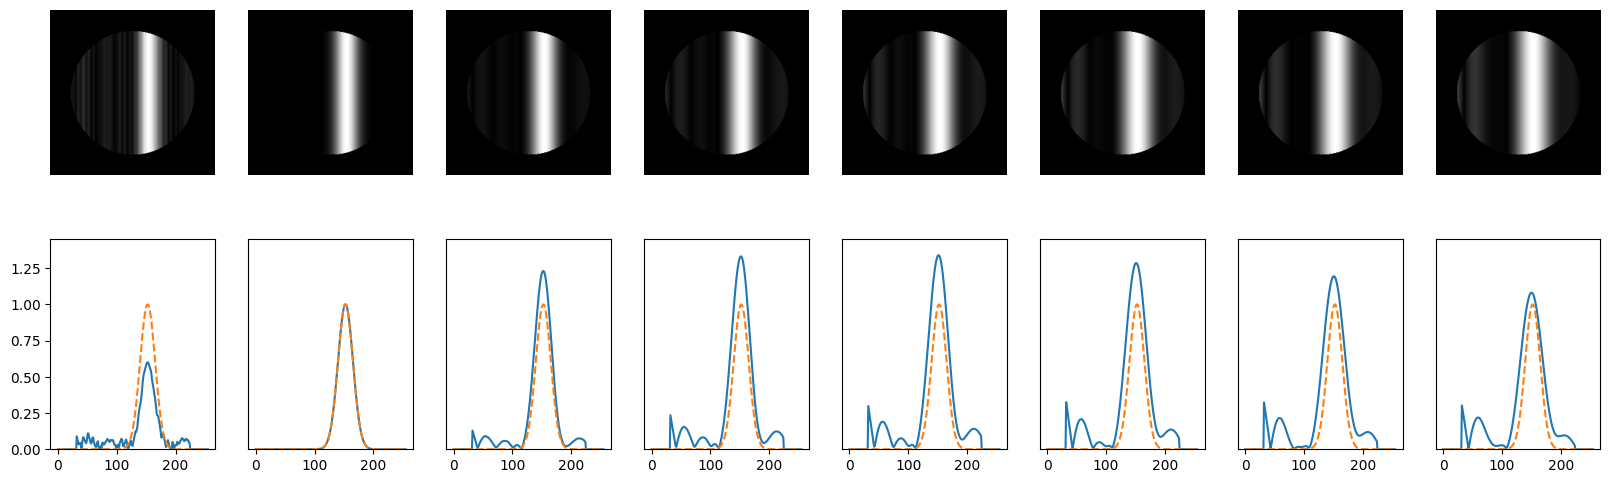

In [38]:
width = 256
height = 256
npcs = 16
gradient = 2 * np.pi
phantom_type = 'circle'
D = responses.gaussian(width, bw=0.2, shift=0.1)

alpha = 30
da = [-20, -10, -0, 10, 20, 30, 40, 50]

alpha = 20
da = [-10,0,10,20,30,40,50,60]

P = [{ 'alpha': np.deg2rad(alpha+da[0]), 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'alpha': np.deg2rad(alpha+da[1]), 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'alpha': np.deg2rad(alpha+da[2]), 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'alpha': np.deg2rad(alpha+da[3]), 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'alpha': np.deg2rad(alpha+da[4]), 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'alpha': np.deg2rad(alpha+da[5]), 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'alpha': np.deg2rad(alpha+da[6]), 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'alpha': np.deg2rad(alpha+da[7]), 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] }]
alpha = np.deg2rad(alpha)

G = []
A = []
for p in P:
    _, __, An = simulation.simulate_gasp(D, npcs=p['npcs'], TRs=p['TRs'], alpha = alpha, gradient = gradient, phantom_type=phantom_type, method='lev-mar-quad')

    Mdata = simulation.simulate_ssfp(width=width, height=height, npcs=p['npcs'], TRs=p['TRs'], alpha = p['alpha'], gradient = gradient, phantom_type=phantom_type)
    Mdata = np.reshape(Mdata,(Mdata.shape[0], Mdata.shape[0], -1))
    Ic = simulation.evaluate_gasp(Mdata, An[0], method='lev-mar-quad')
    G.append(Ic)


D = [D, D, D, D, D, D, D, D]
view_gasp_comparison(G, D, ylim = 1.45)